### ML Zoomcamp - Classification

#### Data preparation

In [1]:
#we'll import the necessary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#we'll donwload the data
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
#let's view the first 5 rows of the dataframe
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [5]:
#next let's check the number of columns and rows in the dataframe
df.shape

(1462, 9)

In [7]:
#we'll check the data types
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [8]:
#let's check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [9]:
#let's check for the missing values in the dataframe
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [10]:
#let's identify categorical and numerical columns
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = [ 'annual_income']

#let's fill missing values
df[categorical_features] = df[categorical_features].fillna('NA')
df[numerical_features] = df[numerical_features].fillna(0)

In [11]:
#we'll check for missing values again to see if the changes is effected
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Q1

In [12]:
#let's find the mode for column 'industry'.
print(df['industry'].mode())

0    retail
Name: industry, dtype: object


### Q2 Biggest correlation

In [13]:
##we'll select numerical data in df.
df_num = df.copy().select_dtypes(include='number')

In [14]:
#we'll show the statistics of df_num.
df_num.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [15]:
#the correletions between all the columns.
df_num.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


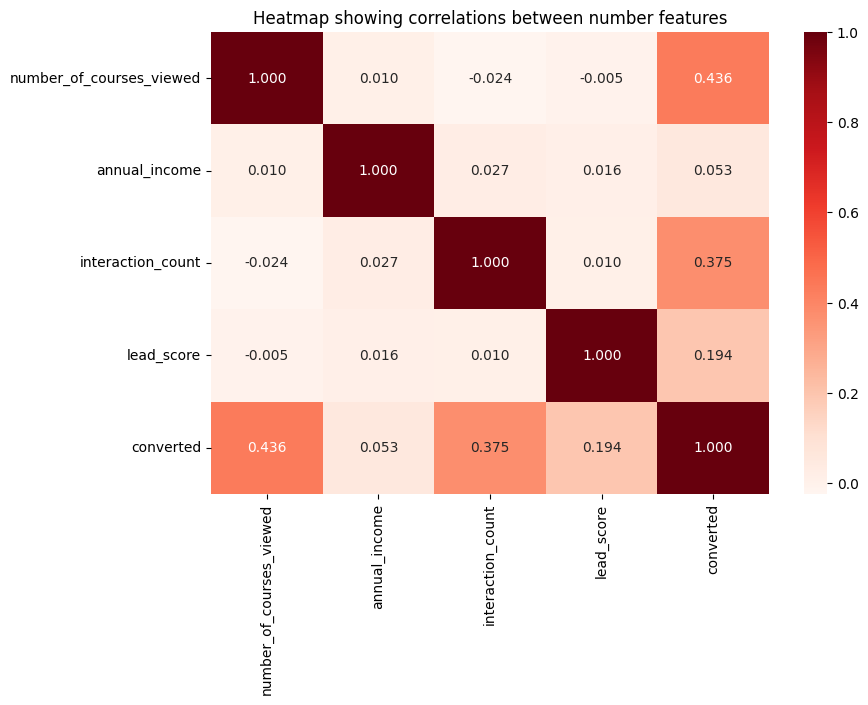

In [16]:
#let's draw the heatmap of the correlations.
plt.figure(figsize=(9, 6))
sns.heatmap(df_num.corr(), cmap="Reds", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between number features')
plt.show();

In [17]:
#let's unstack the correlation values
df_unstack = df_num.corr().unstack().sort_values(ascending = False)
df_unstack

number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
converted                 converted                   1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
converted                 number_of_courses_viewed    0.435914
number_of_courses_viewed  converted                   0.435914
interaction_count         converted                   0.374573
converted                 interaction_count           0.374573
lead_score                converted                   0.193673
converted                 lead_score                  0.193673
                          annual_income               0.053131
annual_income             converted                   0.053131
interaction_count         annual_income               0.027036
annual_income             interaction_count           0.027036
                          lead_score                  0

- Answer to Q2: annual_income and interaction_count

### Split the datasets

In [18]:
#let's import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
# Split df into train/val/test sets with 60%/20%/20% distribution.
SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [20]:
#we'll reset_index for y_train, y_val and y_test
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
#let's define y_full_train, y_train, y_val and y_test
y_full_train = df_full_train.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [22]:
#we'll remove the target varible from the dataframe
del df_full_train["converted"]
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

### Q3 Biggest MI

In [23]:
#we'll define cal_mi function.
def cal_mi(series):
    return mutual_info_score(series, y_train)

In [24]:
#let's list the categorical columns
df_cat = df.copy().select_dtypes(exclude='number').columns
df_cat

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [25]:
#we'll also list the categorical columns
cat_features = ['lead_source', 'industry', 'employment_status', 'location']

In [26]:
#let's calculate MI.
df_mi = df_train[cat_features].apply(cal_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.04
industry,0.01
employment_status,0.01
location,0.00


- Answer to Q3: lead_source

#### Q4 Accuracy

In [28]:
#let's derive X_train.
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [29]:
#we'll fit X_train and y_train to model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
#let's derive X_val
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
#let's obtain y_pred.
y_pred = model.predict(X_val)

In [32]:
#to calculate accuracy
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.7


- Answer to Q4: 0.7

#### Q5 Feature selection

In [33]:
#let's list the features
features = df_train.columns.to_list()
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score']

In [34]:
#applying the feature elimination technique
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [35]:
#we'll print the scores
scores['difference'] = [abs(x) for x in scores['difference']]
scores

,eliminated_feature,accuracy,difference
0,lead_source,0.703072,0.003072
1,industry,0.699659,0.000341
2,number_of_courses_viewed,0.556314,0.143686
3,annual_income,0.853242,0.153242
4,employment_status,0.696246,0.003754
5,location,0.709898,0.009898
6,interaction_count,0.556314,0.143686
7,lead_score,0.706485,0.006485


In [36]:
#we'll select the answer data
ans_list = ['industry', 'employment_status', 'lead_score']
diff_val = [0.000341, 0.003754, 0.006485]

In [37]:
#let's find the least useful feature.
min_diff = min(diff_val)
min_diff

0.000341

- Answer to Q5: industry

#### Q6 Parameter tuning

In [38]:
# we'll split df into train/val/test sets with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [39]:
#we'll reset_index for y_train, y_val and y_test
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [40]:
#let's define y_full_train, y_train, y_val and y_test
y_full_train = df_full_train.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [41]:
#we'll remove the target varible from the dataframe
del df_full_train["converted"]
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

In [42]:
#we'll check the shapes of y_train and y_val
y_train.shape, y_val.shape

((876,), (293,))

In [43]:
#we'll derive X_train.
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [44]:
#let's derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
#let's train and output results.
scores = {}
for alpha in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0.01:	 RMSE = 0.6996587030716723
alpha = 0.1:	 RMSE = 0.6996587030716723
alpha = 1:	 RMSE = 0.6996587030716723
alpha = 10:	 RMSE = 0.6996587030716723
alpha = 100:	 RMSE = 0.6996587030716723


In [46]:
#let's view the scores dictionary
scores

{0.01: 0.7, 0.1: 0.7, 1: 0.7, 10: 0.7, 100: 0.7}

In [47]:
#print the smallest alpha with best accuracy
print(f'The smallest `alpha` with the best accuracy is {max(scores, key=scores.get)}.')

The smallest `alpha` with the best accuracy is 0.01.
